In [3]:
ddir = '~/shared/users/mgarciareyes/saildrone_data/'
fn = 'saildrone_west_coast_survey_2018_sd1024_JPLv5.0_8dy_20210613norep_20210613_20211116.nc'

In [4]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt 
import datetime as dt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import warnings 
import matplotlib.dates as mdates

warnings.simplefilter('ignore') 

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from calendar import month_abbr

In [5]:
ds = xr.open_dataset(ddir+fn)
ds.close()
ds

<xarray.Dataset>
Dimensions:                       (time: 321)
Coordinates:
    trajectory                    object ...
  * time                          (time) datetime64[ns] 2018-07-17T18:35:00 ....
    ob                            (time) int64 ...
Data variables: (12/41)
    lat                           (time) float64 ...
    lon                           (time) float64 ...
    SOG_MEAN                      (time) float64 ...
    COG_MEAN                      (time) float64 ...
    HDG_MEAN                      (time) float64 ...
    PITCH_MEAN                    (time) float64 ...
    ...                            ...
    sat_lon                       (time) float64 ...
    dist_land                     (time) float64 ...
    analysed_sst                  (time) float64 ...
    analysis_error                (time) float64 ...
    mask                          (time) float64 ...
    sea_ice_fraction              (time) float64 ...
Attributes: (12/47)
    area:                      unassigned
    cdm_data_type:             Trajectory
    cdm_trajectory_variables:  trajectory
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             support@saildrone.com
    creator_name:              Saildrone
    ...                        ...
    time_coverage_resolution:  PT1M
    time_coverage_start:       2018-07-17T18:00:00Z
    title:                     Saildrone West Coast Survey 2018
    uuid:                      3e4ce677-18db-4ba8-9c73-f2c1f3ad15ce
    Westernmost_Easting:       -124.915008
    vehicle_id:                sd1024

In [58]:
default_x_ticks

range(0, 321, 32)

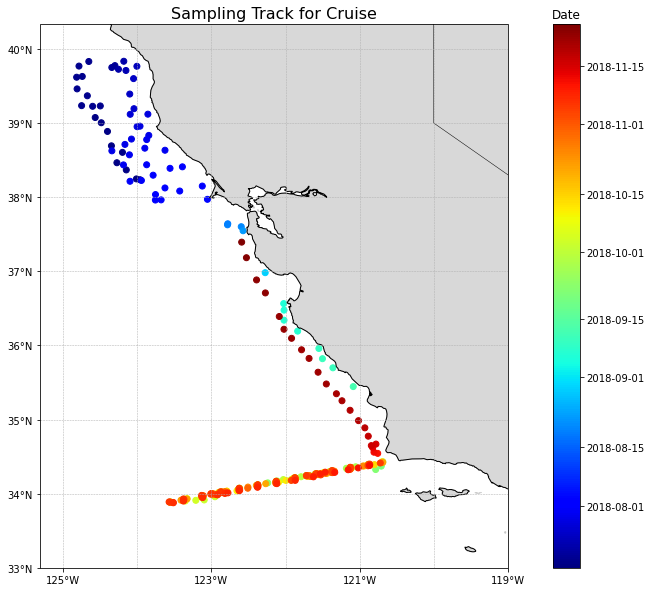

In [6]:
### Plotting trajectory
#define latitude and longitude boundaries
latr = [min(ds['lat']), max(ds['lat'])] 
lonr = [max(ds['lon']), min(ds['lon'])] 

# Select a region of our data, giving it a margin
margin = 0.5 
region = np.array([[latr[0]-margin,latr[1]+margin],[lonr[0]+margin,lonr[1]-margin]]) 

#add state outlines
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

# Create and set the figure context
fig = plt.figure(figsize=(16,10), dpi = 72) 
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.coastlines(resolution='10m',linewidth=1,color='black') 
ax.add_feature(cfeature.LAND, color='grey', alpha=0.3)
ax.add_feature(states_provinces, linewidth = 0.5)
ax.add_feature(cfeature.BORDERS)
ax.set_extent([region[1,0],region[1,1],region[0,0],region[0,1]],crs=ccrs.PlateCarree()) 
ax.set_xticks(np.round([*np.arange(region[1,1],region[1,0]+1,2)][::-1],0), crs=ccrs.PlateCarree()) 
ax.set_yticks(np.round([*np.arange(region[0,0],region[0,1]+1,1)],0), crs=ccrs.PlateCarree()) 
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.gridlines(linestyle = '--', linewidth = 0.5)




ds['date'] = mdates.date2num(ds['time'].dt.date)


default_x_ticks = range(0,len(ds['time']),divmod(len(ds['time']), 10)[0]) #selects out 10 evenly spaced dates from the data
### Creating Date

loc = mdates.AutoDateLocator()
sc = plt.scatter(x = ds['lon'], y = ds['lat'], c=ds['date'], cmap = 'jet') 
# sc = plt.scatter(x = ds['lon'], y = ds['lat'], c = ds['time'], cmap='jet')
#plt.plot(sail['lon'], sail['lat'], ls = ':', c = 'navy', alpha = 0.4)
clb = fig.colorbar(sc, ticks=loc, format=mdates.AutoDateFormatter(loc))
clb.ax.set_title('Date')
# clb.set_ticks(ds['date'][default_x_ticks])
# clb.set_ticklabels(ds['time'].dt.date[default_x_ticks].values)
# Plot track data, color by temperature
#title
plt.title('Trajectory of Cruise', fontdict = {'fontsize' : 20})




# clb = fig.colorbar(sc, ticks=loc)
# clb.ax.set_title('Date')
# clb.set_ticks(ds['time'][default_x_ticks])
# clb.set_ticklabels(ds['time'].dt.date.values)
plt.title('Sampling Track for Cruise', fontdict = {'fontsize' : 16})
plt.show()